In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [48]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Let's plot our data to see whether their is any difference between hours_of_sleep and students scores


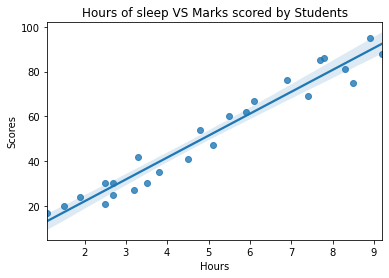

In [50]:
x = df['Hours']
y = df['Scores']
plt.xlabel("Hours Of Sleep")
plt.ylabel("Scores")
plt.title("Hours of sleep VS Marks scored by Students")
sns.regplot(x ,y)

# The good thing is their are no outliers .Now we'll split the data into input (independent) variables and output (dependent) variable

In [51]:
x = df.iloc[:, :-1].values
#x = x.reshape(-1,1)
y = df.iloc[:, 1].values
#y = y.reshape(-1,1)

In [52]:
x.shape,y.shape

((25, 1), (25,))

# We'll split this data into train-test-split and we'll split it by 0.25

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# This is a simple linear model so we'll use linear regression for this

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
#Now we'll use fit method to our dataset
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
#Now lets predict our model
y_pred = lr.predict(x_test)

# Now make use of a scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.

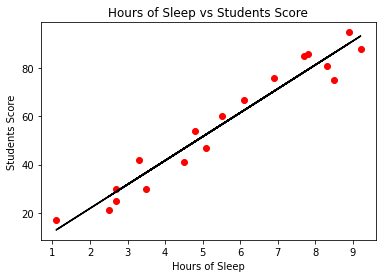

In [57]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "black")
plt.title("Hours of Sleep vs Students Score")
plt.xlabel("Hours of Sleep")
plt.ylabel("Students Score")
plt.show()

# Now lets repeat the same task for our test dataset

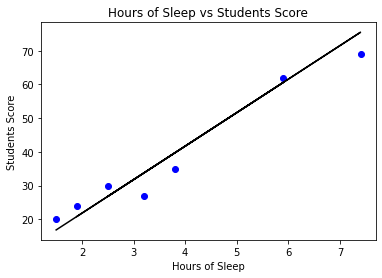

In [58]:
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, lr.predict(x_test), color = "black")
plt.title("Hours of Sleep vs Students Score")
plt.xlabel("Hours of Sleep")
plt.ylabel("Students Score")
plt.show()

# Let's make a few predictions now

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(x_test)

In [61]:
df_Output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Output

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Let's now make our own prediction

In [68]:
#hours_1 = 9.25  That's how many hours I sleep!
sleep = float(input("Enter the Number of hours you sleep : "))
own_pred = lr.predict(np.array(sleep).reshape(-1, 1))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Number of hours you sleep : 9.5
Predicted Score = 96.37814847828855


In [71]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Root Mean Squared Error: 4.5092043283688055
